# データの符号化

このページでは、量子機械学習のためのデータ符号化の問題を紹介し、さまざまなデータ符号化手法について説明し、実装します。


## はじめに

機械学習モデルを成功させるには、データの表現が非常に重要です。古典的な機械学習の場合では、データをいかに数値的に表現し、古典的な機械学習アルゴリズムで最適に処理できるようにするかが問題となります。

量子機械学習の場合、問題は似ていますが、より基本的です：問題は、データをどうやって表現して、量子システムに効率的に入力し、量子機械学習アルゴリズムで処理できるようにするかです。これは通常、データの符号化（データエンコーディング）と呼ばれますが、データの埋め込みまたはロードとも呼ばれます。

このプロセスは、量子機械学習アルゴリズムの重要な部分であり、その計算能力に直接影響します。

## 手法


それぞれが $N$ 個の特徴を持つ$M$個のサンプルで構成される古典的なデータセット$\mathscr{X}$を考えてみましょう: 

** 用語 ** 機能(feature)：特徴とは、学習しようとするものの性質で、数値を割り当てることができるものです。例えば、猫について学習する場合、「身長」、「年齢」、「おやつを食べる傾向」などが特徴として挙げられます。

$$\class{script-x}{\mathscr{X}} = \class{brace}{\{}x^{(1)},\class{ellipsis}{\dots},\cssId{_x-lil-m}{x^{(m)}},\dots,x^{(M)}\class{brace}{\}}$$

ここで、$x^{(m)}$は$m = 1, ..., M$の$N$ 次元ベクトルです。このデータセットを量子ビットのシステムで表すために、さまざまな埋め込み手法を使用できます。以下に、その一部を参考文献1、2に従って簡単に説明し、実装します。 

### 計算基底符号化

計算基底符号化は、古典的な$N$ビット文字列を$N$量子ビットシステムの計算基底状態に関連付けます。 たとえば、$x = 5$の場合、これは0101として4ビット文字列として表すことができ、量子状態$|0101\rangle$として4量子ビットシステムによって表すことができます。より一般的には、$N$ビット文字列：$x = (b_1, b_2, ... , b_N)$の場合、対応する$N$-量子ビット状態は$\cssId{ket-x}{| x \rangle} = | b_1, b_2, ... , b_N \rangle$ です。ここで、$n = 1 , \dots , N$に対して$b_n \class{in}{\in} \{0,1\}$です。

** 用語 ** 計算基底状態：Z基底状態とも呼ばれ、Z（または'計算'）基底で測定したときの状態です。$|00\rangle$や$|00110100\rangle$のようなラベルを持つ状態です。IBMのシステムは常にZ基底で測定します。


上記の古典的なデータセット$\mathscr{X}$の場合に、計算基底符号化を使用するには、各データポイントを$N$ビット文字列 $x^{(m)} = (b_1, b_2, ... , b_N)$ とし、これを量子状態 $|x^{m}\rangle = |b_1, b_2, ... , b_N \rangle$ に直接マッピングします。ここで$n = 1, ...,  N$において、$b_n \in \{0, 1 \} $ であり、また、$m = 1, ..., M$です。 データセット全体を計算基底状態の重ね合わせとして表すことができます。

$$\cssId{_ket-dataset}{| \mathscr{X} \rangle} = \frac{1}{\sqrt{\cssId{_m}{M}}}\cssId{_sum-m}{\sum_{m=1}^{M}|x^{m} \rangle} $$

<!-- ::: q-block -->

### 計算基底符号化

    q-statevector-binary-encoding
      p 左の入力データセットにビット列を追加したり削除したりすると、右の状態ベクトルに計算基底符号化がどのように符号化されるかを見ることができる。

<!-- ::: -->

Qiskitでは、どのような状態でデータセットを符号化するかを計算したら、`initialize`関数を使用して準備することができます。 たとえば、データセット$\mathscr{X} = \{x^{(1)}=101, x^{(2)}=111\}$ は、$|\mathscr{X}\rangle= \frac{1}{\sqrt{2}}(|101\rangle+|111\rangle)$の状態としてエンコードされます：



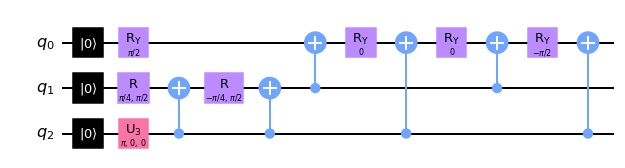

In [2]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])

qc.decompose().decompose().decompose().decompose().decompose().draw("mpl")

この例は、計算基底符号化の欠点も示しています。つまり、計算基底符号化は理解するのは簡単ですが、状態ベクトルは非常に疎になる可能性があり、実装するスキームが通常効率的ではありません。

### 振幅符号化

振幅符号化は、データを量子状態の振幅に符号化します。これは、正規化された古典的な$N$次元データポイント$x$を、$n$量子ビットの量子状態$|\psi_x\rangle$の振幅として表します：

$$|\psi_x\rangle = \sum_{i=1}^N x_i |i\rangle$$

ここで、$N = 2^n$、$x_i$は$x$の$i$番目の要素であり、$|i\rangle$は $i$番目の計算基底状態です。

上記の古典的なデータセット𝒳を符号化するために、すべての𝑀𝑁次元データポイントを長さ𝑁×𝑀の1つの振幅ベクトルに連結します:
$$\alpha=\cssId{_a-norm}{A_{\text{norm}}}(x_{1}^{(1)},...,x_{N}^{(1)},...,x_{1}^{(m)},...,x_{N}^{(m)},...,x_{1}^{(M)},...,x_{N}^{(M)})$$

ここで、$A_{\text{norm}}$は正規化定数であり、$|\alpha|^2 = 1$です。 データセット$\mathscr{X}$は、計算基底で次のように表すことができます。
$$|\mathscr{X}\rangle = \sum_{i=1}^N \alpha_i |i\rangle$$


ここで、$\alpha_i$は振幅ベクトルの要素であり、$|i\rangle$は計算基底状態です。 符号化される振幅の数は$N \times M$です。 $n$量子ビットのシステムは$2^n$個の振幅を提供するので、振幅の埋め込みには$n \ge \mathrm{log}_2(NM)$個の量子ビットが必要です。

<!-- ::: q-block -->

### 振幅符号化

    q-statevector-amplitude-encoding
      p 左側のデータポイントの値を変更し、振幅エンコーディングがこれらを右側の状態ベクトルとしてどのようにエンコードするかを確認します。
<!-- ::: -->



例として、振幅符号化を使用してデータセット$\mathscr{X}= \{x^{(1)}=(1.5,0), x^{(2)}=(-2,3)\}$ を符号化してみましょう。両方のデータポイントを連結し、結果のベクトルを正規化すると、次のようになります:

$$\alpha = \frac{1}{\sqrt{15.25}}(1.5,0,-2,3)$$

結果として得られる2量子ビットの量子状態は次のようになります:

$$|\mathscr{X}\rangle = \frac{1}{\sqrt{15.25}}(1.5|00\rangle-2|10\rangle+3|11\rangle)$$



上記の例では、振幅ベクトルの要素の総数$N \times M$は2の累乗です。$N \times M$が2の累乗でない場合、$2^n\geq MN$となるように$n$の値を選び、振幅ベクトルに情報量の少ない定数を埋め込めばよいです。

計算基底符号化と同様に、データセットを符号化する状態を計算したら、Qiskitで`initialize`関数を使用してを準備できます:

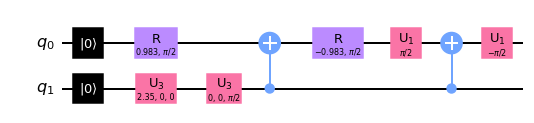

In [4]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw("mpl")

振幅符号化の利点は、符号化に必要なのは$\mathrm{log}_2(NM)$ 量子ビットのみであるということです。 ただし、その後のアルゴリズムは量子状態の振幅を操作する必要があり、量子状態を準備し測定する方法は効率的ではない傾向があります。

### 角度符号化

角度符号化は、$N$個の機能(feature)を$n$量子ビットの回転角に符号化します。ここで、$N \le n$です。 たとえば、データポイント$x = (x_1,...,x_N)$は次のように符号化できます。

$$\cssId{_}{|x\rangle} = \class{_big-o-times-n}{\bigotimes^N_{i=1}} \cos(x_i)|0\rangle + \sin(x_i)|1\rangle$$


** 用語 ** $\class{_big-o-times-n}{\bigotimes^N_{i=1}}$：大きなシグマ（$\Sigma$）が異なる値の総和を表すのと同じように、この大きな「otimes」は、ある値の集合に対して、その右側にある式のクロネッカー積を取ることを意味します。

これは、前の2つの符号化方法とは異なり、データセット全体ではなく、一度に1つのデータポイントのみを符号化する方法です。ただし、使用するのは$N$量子ビットで量子回路の深さも一定であるため、現在の量子ハードウェアに適用可能です。

角度符号化はユニタリー演算で指定することができます：



$$ S_{x_j} = \class{_big-o-times-n}{\bigotimes_{i=1}^N} U(x_j^{(i)}) $$


ここで

$$
U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) & -\sin(x_j^{(i)}) \\ \sin(x_j^{(i)}) & \cos(x_j^{(i)}) \\ \end{bmatrix}
$$

** 用語 ** ユニタリー演算：ユニタリー演算とは、ノルムを保存する（つまり、確率の和が常に1になるようにする）可逆的な演算です。[続きを読む](https://en.wikipedia.org/wiki/Unitary_matrix) 

$Y$軸周りの単一量子ビットの回転は次のとおりでした: 

$$RY(\theta) = \exp(-i \frac{\theta}{2} Y) = \begin{pmatrix} \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\ \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}} \end{pmatrix} $$            

 $U(x_j^{(i)}) = RY(2x_j^{(i)})$に注意し、例として、qiskitを使用してデータポイント$x = (0, \pi/4, \pi/2)$ を符号化します：

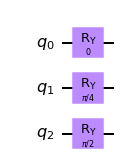

In [6]:
qc = QuantumCircuit(3)

qc.ry(0, 0)
qc.ry(math.pi/4, 1)
qc.ry(math.pi/2, 2)
qc.draw("mpl")

高密度角度符号化は、角度符号化を少し一般化したものであり、相対位相を使用して1量子ビットごとに2つの特徴を符号化します。データポイント$x = (x_1,...,x_N)$は次のように符号化されます:

$$|x\rangle = \class{_big-o-times-n2}{\bigotimes_{i=1}^{N/2}} \cos(x_{2i-1})|0\rangle + e^{i x_{2i}}\sin(x_{2i-1})|1\rangle$$

角度および高密度角度符号化は、正弦波関数および指数関数を使用しますが、この関数は特別である必要はなく、任意の関数を使う一般的な量子ビットの符号化クラスに簡単に抽象化できます。次のように、任意のユニタリー演算で定義されたパラメタライズド量子回路で符号化を実装することもできます。

### 任意の符号化

任意の符号化は、$N$個の特徴を$n$量子ビット上の$N$個のパラメーター化されたゲートの回転として符号化します。ここで、$n \leq N$です。角度符号化と同様に、データセット全体ではなく、一度に1つのデータポイントのみを符号化します。 また、一定の深さの量子回路と$n \leq N$ 量子ビットを使用しているため、現在の量子ハードウェアで実行できます。


たとえば、Qiskit [`EfficientSU2`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html) 回路を使用して12個の特徴を符号化するには、3個の量子ビットを使用するだけです:

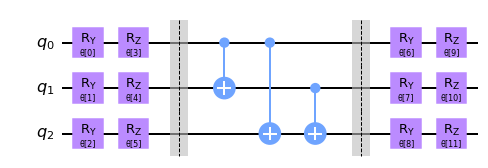

In [7]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw("mpl")

例えば、データポイント$x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]$を12の特徴で符号化し、パラメーター化された各ゲートを使用して異なる特徴を符号化します。

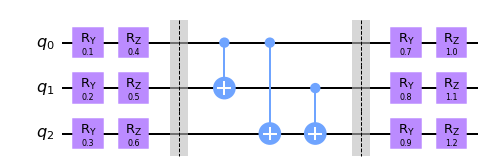

In [8]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

encode = circuit.bind_parameters(x)
encode.decompose().draw("mpl")

3量子ビットのQiskit [`ZZFeatureMap`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html) 回路は、6つのパラメーター化ゲートがあるにもかかわらず、3つの機能のデータポイントしか符号化しません:

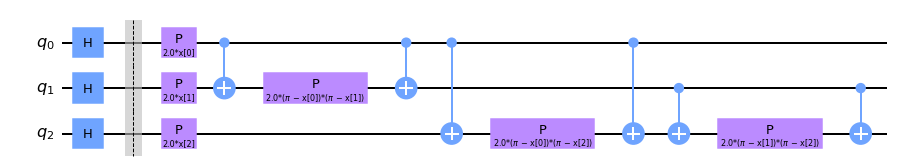

In [9]:
from qiskit.circuit.library import ZZFeatureMap

circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw("mpl")

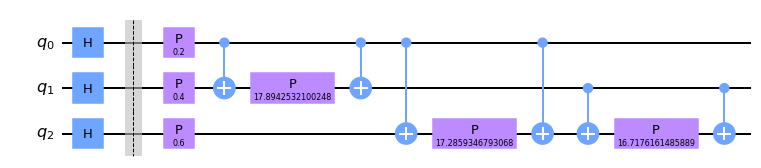

In [10]:
x = [0.1, 0.2, 0.3]

encode = circuit.bind_parameters(x)
encode.decompose().draw("mpl")

<!-- ::: q-block.exercise -->

### 簡単なクイズ

<!-- ::: q-quiz(goal="qml-encoding-0") -->

<!-- ::: .question -->

パラメーター化された量子回路には16個のパラメータがあります。 エンコードできる機能の最大数はいくつですか？
<!-- ::: -->

<!-- ::: .option -->

1. 4

<!-- ::: -->

<!-- ::: .option -->

2. 8

<!-- ::: -->

<!-- ::: .option(correct) -->

3. 16

<!-- ::: -->

<!-- ::: .option -->

3. 32

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

さまざまなタイプのデータに対するさまざまなパラメーター化された量子回路の性能は、活発に研究されている分野です。

<div style="display: none">
$$\cssId{big-o-times}{\bigotimes}$$
</div>

## References

1.  Maria Schuld and Francesco Petruccione, *Supervised Learning with Quantum Computers*, Springer 2018, [doi:10.1007/978-3-319-96424-9](https://www.springer.com/gp/book/9783319964232).
2. Ryan LaRose and Brian Coyle, *Robust data encodings for quantum classifiers*, Physical Review A 102, 032420 (2020), [doi:10.1103/PhysRevA.102.032420](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.102.032420), [arXiv:2003.01695](https://arxiv.org/abs/2003.01695).

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
